Можем ли мы с помощью нейрона решать задачи классификации, так же как и с помощью логистической регрессии? Да, для этого его предсказание отправим в основу лог. регрессии — функцию, называемую сигмоида, и поменяем loss на BCE.

Ваша финальная задача модуля состоит в том чтобы дополнить текущую заготовку до рабочего нейрона классификации,. Для этого нужно задать функции для подсчета градиентов и функцию для обучения

Мы сгенерировали для вас тренировочный датасет. Вам нужно обучиться на нём и оставить внутри переменной n_class свою модель. Мы прогоним её на скрытом датасете и в случае если модель показала точность > 90%, то задача засчитывается как выполненная.


Для начала немного задач по numpy, для разминки

In [1]:
import numpy as np
a = np.eye(3).astype(bool)
print(a)

[[ True False False]
 [False  True False]
 [False False  True]]


In [2]:
# Сделайте функцию, которая делает квадратный массив заданного размера а
# Значения в массиве по главной диагонали True, остальные False
# подсказка - используйте np.eye

def create_matrix(size):
    # место для вашего кода
    return np.eye(size).astype(bool)

tests = [[], [[ True]], \
         [[ True, False], [False,  True]],\
         [[ True, False, False],
          [False,  True, False],
          [False, False,  True]]]

passed = True
for i, test in enumerate(tests):
    if not np.equal(test, create_matrix(i)).all():
        passed = False
if passed:
    print("Поздравляем")
else:
    print("Попробуйте ещё")

Поздравляем


In [3]:
# используя np.where получите из массива а, 
# массив где числа больше 8 заменены на 1/x, где x это число, которое больше 8
a = np.array([1,1,2,3,5,8,13,21,34])
b = np.where(a > 8, 1/a, a)
if np.equal(b, [1,1,2,3,5,8,1/13,1/21,1/34]).all():
    print("Правильно!")
else:
    print("Попробуйте ещё")

Правильно!


In [4]:
# Сделайте функцию, моделирующую нейрон W*x+b с помощью @(np.dot)
# в данном случае, x может быть любого размера, 
# его элементы будут домножаться на w, который равен индексу элемента x
# например x = (1, 1, 1) w = (0, 1, 2)
# а b возьмём равным 7

def neuron_func(x):
    # место для вашего кода
    x = np.array(x)
    w = np.arange(x.shape[0])
    b = 7
    r = x @ w + b
    return r
    

tests = [
[[1,1,1,1], [13]],
[[7,24, 11, 99], [350]],
[[3, 3, -50], [-90]],
[[926, 000, 42, 35, 999], [4192]]
]

passed = True
for test in tests:
    if not neuron_func(test[0]) == test[1]:
        passed = False

if passed:
    print("Успех")
else:
    print("Попробуйте ещё")

Успех


In [ ]:
# Сделайте функцию, которая сконкатенирует два numpy массива вертикально
# Пример func[[[1, 2]], [[3, 4]]) = [[1, 2], [3, 4]]

def func(x, y):
    # место для кода

tests = [
         [[[1,2]],[[3,4]],[[1, 2],[3, 4]]],
         [[[88,999,5]],[[3,3,1]],[[88,999,5],[3,3,1]]],
         [[[1]],[[2]], [[1], [2]]],
         [[[1], [2], [3]],[[4],[5],[6]], [[1], [2], [3], [4], [5], [6]]]
]

passed = True
for test in tests:
    if not (func(test[0], test[1]) == test[2]).all():
        passed = False

if passed:
    print("Верно")
else:
    print("Попробуйте ещё")

Теперь вы готовы перейти к основной задаче

## Логистическая регрессия



Импортируем основные библиотеки:

In [5]:
import math
import numpy as np
import seaborn as sns

Определим сигмоиду для обработки вывода нейрона:

In [6]:
def sigmoid(x):
    return 1/(1 + math.exp(-x))

Определим BCE loss: 

In [7]:
def BCE_loss(target_labels, predicts):
    sum = 0
    for i in range(len(target_labels)):
        sum += (-target_labels[i] * np.log(predicts[i]) \
               - (1-target_labels[i]) * np.log(1 - predicts[i])) 
    return sum / len(target_labels)

В данной формуле могут возникнуть нерегулярности, в случае, если нейрон предсказывает идеально и если предсказывает идеально наоборот.



In [8]:
# идеальное предсказание
print(BCE_loss([0, 1], [0, 1]))

nan


In [9]:
# антиидеальное предсказание
print(BCE_loss([0, 1], [1, 0]))

inf


Для второго случая поможет правильная инициализация весов, а в первом случае проблема состоит в том, что хоть сеть и предсказывает правильно, но в формуле всё равно считаются оба логарифма. Один из которых умножается на 0, но всё равно равен nan, а nan*0 = nan

Давайте поправим формулу так, чтобы считался один логарифм за раз, например, добавим if проверку на target_labels[i] и будем считать только одно слагаемое — то, которое не домножается на 0 в обычной формуле.

In [10]:
def BCE_loss(target_labels, predicts):
    sum = 0
    for i in range(len(target_labels)):
        if target_labels[i] == 0:
            sum += - (1-target_labels[i]) * np.log(1 - predicts[i]) 
        else:
            if target_labels[i] == 1:
                sum += -np.log(predicts[i])
            else:
                sum += (-target_labels[i] * np.log(predicts[i]) \
                - (1-target_labels[i]) * np.log(1 - predicts[i])) 
    return sum / len(target_labels)

Проверим значение теперь. Должно быть 0, а не nan:

In [11]:
print(BCE_loss([0, 1], [0, 1]))

0.0


## От регрессии к нейрону

Перейдем к нейрону — нужно задать ему функции для подсчета градиентов w и b и для обучения.

Напомню, что итоговая функция потерь выглядит как BCE_loss(sigmoid(W*x + b)), это будет полезно для вывода формулы производной

In [21]:
class OneLinearLearnableNeuronClassification:
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

        self.n_iter = 50 # выберите количество итераций самостоятельно
        self.lr = 0.1 # выберите lr сами
    
    def calc_grad_w(self, x, y):
        # место для вашего кода
        return x*(sigmoid(self.w*x + self.b) - y)

    def calc_grad_b(self, x, y):
        # место для вашего кода
        return (sigmoid(self.w*x + self.b) - y)

    def apply(self, x):
        return sigmoid(x * self.w + self.b)
    
    def calc_loss(self, target, predict):
        return MSE_loss(np.array(target).reshape(1, -1),\
                        np.array(predict).reshape(1, -1))
                        
    def train(self, x, y):
        # место для вашего кода 
        # self.lr = lr
        # loss_hist = []
        for j in range(len(x)):
            for i in range(self.n_iter):
                self.w = self.w - x[j]*(sigmoid(self.w*x[j]+self.b)-y[j]) * self.lr
                self.b = self.b - (sigmoid(self.w*x[j] + self.b) - y[j]) * self.lr
   
    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

### Проверка кода

Проверим этот код. Проверка calc_grad_w при весах 1, 1 должна выдавать такие значения: 

> calc_grad_w(1, 1) = -0.11920292202211769


> calc_grad_w(2, 2) = -2.0948517463551335



In [14]:
n_test = OneLinearLearnableNeuronClassification(1, 1)
print(n_test.calc_grad_b(1,1))
print(n_test.calc_grad_b(2,2))

-0.11920292202211769
-1.0474258731775667


Подсказка-проверка calc_grad_b при весах 1, 1 должна выдавать такие значения:

> calc_grad_b(1, 1) = -0.11920292202211769

> calc_grad_b(2, 2) = -1.0474258731775667

In [19]:
n_test = OneLinearLearnableNeuronClassification(1, 1)
print(n_test.calc_grad_b(1,1))
print(n_test.calc_grad_b(2,2))

-0.11920292202211769
-1.0474258731775667


## Данные и обучение нейрона

Генерируем данные для обучения. Мы будем учить нейрон отличать числа больше 5 (класс 1) от чисел меньше 5 (класс 0). Да, задача довольно простая, но надо же с чего-то начинать?

<AxesSubplot:>

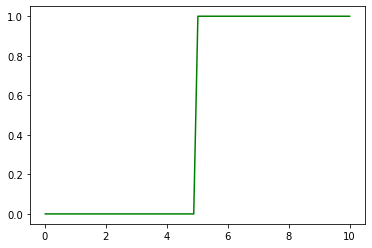

In [18]:
x_class_train = (np.random.random((200))) * 10

y_class_train = [1 if x > 5 else 0 for x in x_class_train]

sns.lineplot(x = x_class_train, y = y_class_train, color = "g")

Инициализируем нейрон и обучаем его:

In [22]:
n_class = OneLinearLearnableNeuronClassification(1, 1)

n_class.train(x_class_train, y_class_train)

## Подсчет точности и оценка работы

Зададим функцию для подсчета точности нашей сети — процентного соотношения правильных ответов ко всем ответам:

In [23]:
def calc_accuracy(predictions, target_classes):
    predictions = np.round(predictions)
    correct_predicts = np.equal(predictions, target_classes)
    return correct_predicts.sum() / len(correct_predicts)

In [24]:
predictions = [n_class.apply(x) for x in x_class_train]

print(calc_accuracy(predictions, y_class_train))

0.995


Проверка для финальной задачи:

In [25]:
x_class_test = (np.random.random((40))) * 10
y_class_test = [1 if x > 5 else 0 for x in x_class_test]

predictions = [n_class.apply(x) for x in x_class_test]
if calc_accuracy(predictions, y_class_test) > 0.9:
    print("Работа выполнена успешно")
else:
    print("Не достигнут нужный результат, попробуйте ещё раз")

Работа выполнена успешно
